In [4]:
ser.close()

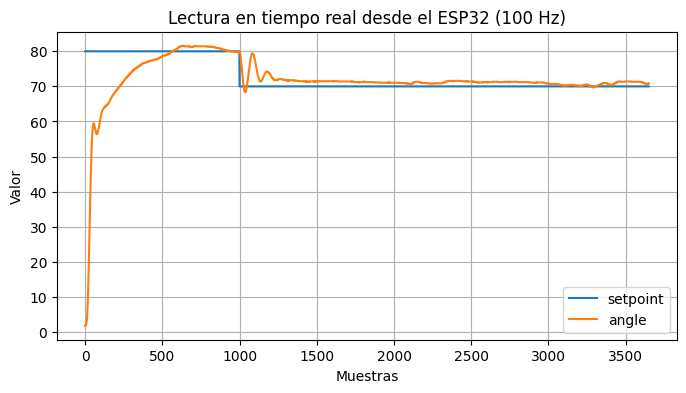

FIN


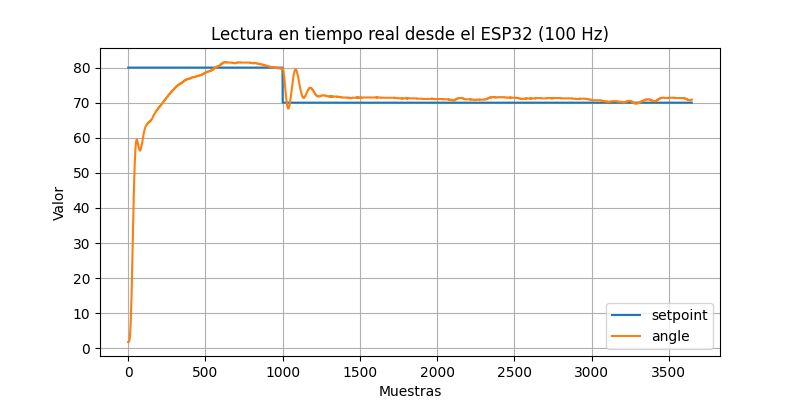

In [5]:
import serial
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

%matplotlib widget

# ---------------- CONFIG ----------------
PORT = "COM4"
BAUD = 115200
MAX_POINTS = 1000*35
DURATION = 40
PLOT_EVERY = 10

# ---------------- SERIAL ----------------
ser = serial.Serial(PORT, BAUD)
time.sleep(2)

# ---------------- BUFFERS ----------------
t = []
setpoint_list = []
angle_list = []

plt.figure(figsize=(8,4))

start = time.time()
i = 0

def try_parse_float(x):
    """Devuelve None si no se puede convertir a float."""
    try:
        return float(x)
    except:
        return None

# ---------------- LOOP ----------------
while time.time() - start < DURATION:
    try:
        line = ser.readline().decode(errors='ignore').strip()

        # Separar por coma
        parts = line.split(",")

        # Necesitamos al menos: setpoint, angle
        if len(parts) < 2:
            continue

        # Intentar convertir
        sp = try_parse_float(parts[0])
        ang = try_parse_float(parts[1])

        # Si es basura → ignorar
        if sp is None or ang is None:
            continue

        # ---------------- GUARDAR ----------------
        t.append(i)
        setpoint_list.append(sp)
        angle_list.append(ang)
        i += 1

        # ---------------- GRAFICAR ----------------
        if i % PLOT_EVERY == 0:
            clear_output(wait=True)
            plt.clf()
            plt.plot(t[-MAX_POINTS:], setpoint_list[-MAX_POINTS:], label="setpoint")
            plt.plot(t[-MAX_POINTS:], angle_list[-MAX_POINTS:], label="angle")
            plt.legend()
            plt.grid(True)
            plt.xlabel("Muestras")
            plt.ylabel("Valor")
            plt.title("Lectura en tiempo real desde el ESP32 (100 Hz)")
            display(plt.gcf())

    except Exception as e:
        print("ERROR:", e)
        break

ser.close()
print("FIN")
